In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#custom style HTML output

from IPython.core.display import HTML

csspath1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-table.css'
csspath2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-notebook.css'

css = open(csspath1).read() + open(csspath2).read()
HTML('<style>{}</style>'.format(css))

In [3]:
# Load "FluTrain.csv" into a data frame called FluTrain

FluTrain = pd.read_csv('DATA\FluTrain.csv')

In [4]:
FluTrain.head()

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436


In [5]:
# Looking at the time period 2004-2011, which week 
# corresponds to the highest percentage of ILI-related 
# physician visits?

FluTrain.iloc[FluTrain['ILI'].idxmax()]

Week       2009-10-18 - 2009-10-24
ILI                        7.61889
Queries                          1
Name: 302, dtype: object

In [6]:
# Which week corresponds to the highest percentage 
# of ILI-related query fraction?

FluTrain.iloc[FluTrain['Queries'].idxmax()]

Week       2009-10-18 - 2009-10-24
ILI                        7.61889
Queries                          1
Name: 302, dtype: object

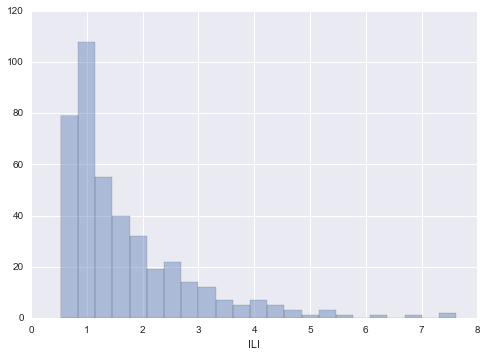

In [7]:
# Let us now understand the data at an aggregate level. 
# Plot the histogram of the dependent variable, ILI.

# A histogram represents the distribution of data by 
# forming bins along the range of the data and then 
# drawing bars to show the number of observations 
# that fall in each bin.

sns.distplot(FluTrain.ILI,kde=False)

In [8]:
# Most of the ILI values are small, with a relatively 
# small number of much larger values (in statistics, 
# this sort of data is called "skew right").

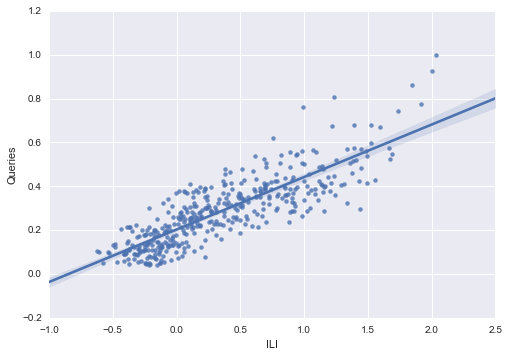

In [9]:
# When handling a skewed dependent variable, it is
# often useful to predict the logarithm of the 
# dependent variable instead of the dependent 
# variable itself -- this prevents the small number 
# of unusually large or small observations from 
# having an undue influence on the sum of 
# squared errors of predictive models.

# Plot the natural logarithm of ILI versus Queries. 
# What does the plot suggest?.

# regplot() accepts the x and y variables in a variety 
# of formats including simple numpy arrays, pandas Series 
# objects, or as references to variables in a pandas 
# DataFrame object passed to data. In contrast, lmplot()
# has data as a required parameter and the x and y variables 
# must be specified as strings. This data format is called 
# “long-form” or “tidy” data. Other than this input 
# flexibility, regplot() possesses a subset of lmplot()‘s 
# features, so we will demonstrate them using the latter.

sns.regplot(np.log(FluTrain.ILI),FluTrain.Queries)

In [10]:
FluTrain.columns

Index(['Week', 'ILI', 'Queries'], dtype='object')

In [11]:
# Let's create the regression model from the previous problem 

formula = "np.log(ILI) ~ Queries"

linreg_model1 = sm.ols(formula=formula, data=FluTrain).fit()
print(linreg_model1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.708    
Dependent Variable: np.log(ILI)      AIC:                179.9482 
Date:               2016-05-01 17:18 BIC:                188.0144 
No. Observations:   417              Log-Likelihood:     -87.974  
Df Model:           1                F-statistic:        1011.    
Df Residuals:       415              Prob (F-statistic): 2.62e-113
R-squared:          0.709            Scale:              0.089714 
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     -0.4993    0.0304  -16.4217  0.0000  -0.5591  -0.4396
Queries        2.9613    0.0931   31.7996  0.0000   2.7782   3.1443
------------------------------------------------------------------
Omnibus:               9.797        Durbin-Watson:           0.283
Prob(Omn

In [12]:
# What is the training set R-squared value for 
# FluTrend1 model (the "Multiple R-squared")?

linreg_model1.rsquared

0.70902005534818646

In [13]:
# For a single variable linear regression model, 
# there is a direct relationship between the R-squared 
# and the correlation between the independent and the 
# dependent variables. What is the relationship we 
# infer from our problem? (Don't forget that you 
# can use the corr() function to compute the 
# correlation between two series.)

cor = np.log(FluTrain.ILI).corr(FluTrain.Queries)
cor

0.84203328636591701

In [14]:
cor**2

0.70902005534818635

In [15]:
# The csv file FluTest.csv provides the 2012 weekly data 
# of the ILI-related search queries and the observed weekly 
# percentage of ILI-related physician visits. Load this 
# data into a data frame called FluTest.

FluTest = pd.read_csv('DATA/FluTest.csv')
FluTest.head(1)

,Week,ILI,Queries
0,2012-01-01 - 2012-01-07,1.766707,0.593625


In [16]:
# However, the dependent variable in our model is np.log(FluTrain.ILI), 
# so PredTest1 would contain predictions of the np.log(FluTrain.ILI) value. 
# We are instead interested in obtaining predictions of the ILI 
# value. We can convert from predictions of log(ILI) to 
# predictions of ILI via exponentiation.

linreg_model1_predictions = np.exp(linreg_model1.predict(FluTest))

In [17]:
# What is our estimate for the percentage of ILI-related 
# physician visits for the week of March 11, 2012?

index = FluTest[FluTest.Week.str.startswith('2012-03-11')].index[0]

linreg_model1_predictions[index]

2.1873777211145455

In [18]:
# What is the relative error betweeen the estimate 
# (our prediction) and the observed value for the 
# week of March 11, 2012? 

# Note that the relative error is calculated as 
# (Observed ILI - Estimated ILI)/Observed ILI

index = FluTest[FluTest.Week.str.startswith('2012-03-11')].index[0]

(FluTest.ILI[index] - linreg_model1_predictions[index])/FluTest.ILI[index]

0.046238266364745831

In [19]:
# What is the Root Mean Square Error (RMSE) between our estimates 
# and the actual observations for the percentage of ILI-related 
# physician visits, on the test set?

np.sqrt(np.mean((linreg_model1_predictions - FluTest.ILI)**2))

0.74906452710196625

In [20]:
# First, we need to decide the amount of time to lag the observations. 
# Because the ILI variable is reported with a 1- or 2-week lag, a 
# decision maker cannot rely on the previous week's ILI value to 
# predict the current week's value. Instead, the decision maker 
# will only have data available from 2 or more weeks ago. We 
# will build a variable called ILILag2 that contains the ILI 
# value from 2 weeks before the current observation.

# Create the ILILag2 variable in the training set

FluTrain['ILILag2'] = FluTrain['ILI'].shift(2)
FluTrain.head()

,Week,ILI,Queries,ILILag2
0,2004-01-04 - 2004-01-10,2.418331,0.237716,NaN
1,2004-01-11 - 2004-01-17,1.809056,0.220452,NaN
2,2004-01-18 - 2004-01-24,1.712024,0.225764,2.418331
3,2004-01-25 - 2004-01-31,1.542495,0.237716,1.809056
4,2004-02-01 - 2004-02-07,1.437868,0.224436,1.712024


In [21]:
# How many values are missing in the new ILILag2 variable?

FluTrain.ILILag2.isnull().sum()

2

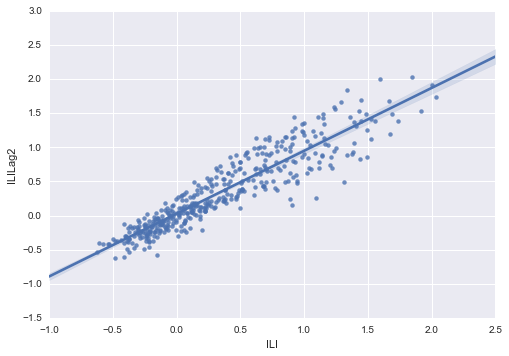

In [22]:
# Use the plot() function to plot the log of ILILag2 against 
# the log of ILI.There is a strong positive relationship 
# between log(ILILag2) and log(ILI).

sns.regplot(np.log(FluTrain.ILI),np.log(FluTrain.ILILag2))

In [23]:
# Train a linear regression model on the FluTrain dataset to predict 
# the log of the ILI variable using the Queries variable as well as 
# the log of the ILILag2 variable.

formula = "np.log(ILI) ~ Queries + np.log(ILILag2)"

linreg_model2 = sm.ols(formula=formula,data=FluTrain,missing='drop').fit()

print(linreg_model2.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(ILI)   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1993.
Date:                Sun, 01 May 2016   Prob (F-statistic):          1.38e-212
Time:                        17:18:34   Log-Likelihood:                 147.24
No. Observations:                 415   AIC:                            -288.5
Df Residuals:                     412   BIC:                            -276.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.2406      0.020    -

In [24]:
# Which coefficients are significant at the p=0.05 level in this 
# regression model?

# Signif. codes:  0 ‘***’ / 0.001 ‘**’ / 0.01 ‘*’ / 0.05 ‘.’ / 0.1 ‘ ’

linreg_model2.pvalues < 0.05

Intercept          True
Queries            True
np.log(ILILag2)    True
dtype: bool

In [25]:
# What is the R^2 value of linreg_model2?

linreg_model2.rsquared

0.90634144454906762

In [26]:
# So far, we have only added the ILILag2 variable to the 
# FluTrain data frame. To make predictions with our 
# linreg_model2 model, we will also need to add ILILag2 
# to the FluTest data frame (note that adding variables 
# before splitting into a training and testing set 
# can prevent this duplication of effort).

FluTest['ILILag2'] = FluTest['ILI'].shift(2)
FluTest.head(3)

,Week,ILI,Queries,ILILag2
0,2012-01-01 - 2012-01-07,1.766707,0.593625,NaN
1,2012-01-08 - 2012-01-14,1.543401,0.499336,NaN
2,2012-01-15 - 2012-01-21,1.647615,0.500664,1.766707


In [27]:
# How many missing values are there in this new variable?

FluTest.ILILag2.isnull().sum()

2

In [28]:
FluTrain.ILI[-2:]

415    1.852736
416    2.124130
Name: ILI, dtype: float64

In [29]:
FluTest.ILILag2[:2]

0   NaN
1   NaN
Name: ILILag2, dtype: float64

In [30]:
FluTest.ILILag2[:2] = FluTrain.ILI[-2:]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
# What are the new values of the ILILag2 variable in the first rows of FluTest?

FluTest.ILILag2.head()

0    1.852736
1    2.124130
2    1.766707
3    1.543401
4    1.647615
Name: ILILag2, dtype: float64

In [35]:
# Obtain test set predictions of the ILI variable from the FluTrend2 model, 
# again remembering to call the exp() function on the result of the predict() 
# function to obtain predictions for ILI instead of log(ILI).

#linreg_model2_predictions = np.exp(linreg_model2.predict(FluTest))

# Note: The statsmodels library has a bug with predicting on NaNs